<a href="https://colab.research.google.com/github/themodernturing/Supreme-Court-Decision-Making-CART-Model-/blob/main/Supreme_Court_Decision_Making_CART_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Supreme Court Outcomes: The Power of CART Analysis and Judge Stevens' Rulings**

The legal system is a complex web of decisions and precedents, significantly shaped by the judges at its helm. Our recent study delves into the patterns behind Judge Stevens' rulings, particularly focusing on factors leading to case reversals. Utilizing a Classification and Regression Tree (CART) model in Python, we've meticulously analyzed case data—examining the roles of various parties, issues, and lower court decisions to unearth what influences a reversal.

This approach allowed us to apply a sophisticated statistical tool to predict outcomes based on historical data, offering a deeper understanding of the dynamics at play in Judge Stevens' courtroom. By converting complex legal data into a visual decision tree, we made the insights accessible, shedding light on the intricacies of judicial decision-making.

This simplified analysis aims to demystify the judicial process, offering a clearer understanding of how legal decisions are made and the pivotal role played by judges like Stevens in guiding the law's evolution.



To conduct an **exploratory data analysis (EDA)** on your dataset, we'll follow several steps to understand the distribution of variables and explore potential relationships between them. I'll start by loading the dataset to get a sense of its structure, types of variables, and to identify if there are any missing values. From there, we can proceed with more detailed analysis and visualization.

Let's begin by loading the dataset and taking a look at the first few rows to understand what kind of data we're working with.

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'stevens.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


The dataset contains the following columns:

    Docket: The docket number of the case.
    Term: The term of the court.
    Circuit: The circuit court that heard the case.
    Issue: The issue category of the case.
    Petitioner: The type of petitioner in the case.
    Respondent: The type of respondent in the case.
    LowerCourt: The political leaning of the lower court's decision (liberal or conservative).
    Unconst: A binary indicator of whether the case involves a constitutional issue (0 = No, 1 = Yes).
    Reverse: A binary indicator of whether the Supreme Court reversed the lower court's decision (0 = No, 1 = Yes).

For our exploratory data analysis, we can focus on several aspects:

    Distribution of Variables: We'll look at the distribution of categorical variables (such as Circuit, Issue,
    Petitioner, Respondent, LowerCourt) and numerical variables (Term).
    Potential Relationships: We'll explore potential relationships between variables, such as how the issue
    category might relate to the reversal of decisions or the influence of the circuit on the outcomes.
    Visualizations: We'll use visualizations like bar charts for categorical distributions, histograms for
    numerical distributions, and scatter plots or box plots to explore relationships between variables.

Let's start by examining the distribution of the categorical variables and the Term variable. After that, we'll look into relationships between variables, such as the rate of reversal based on the circuit or issue category, and whether constitutional issues are more likely to be reversed.

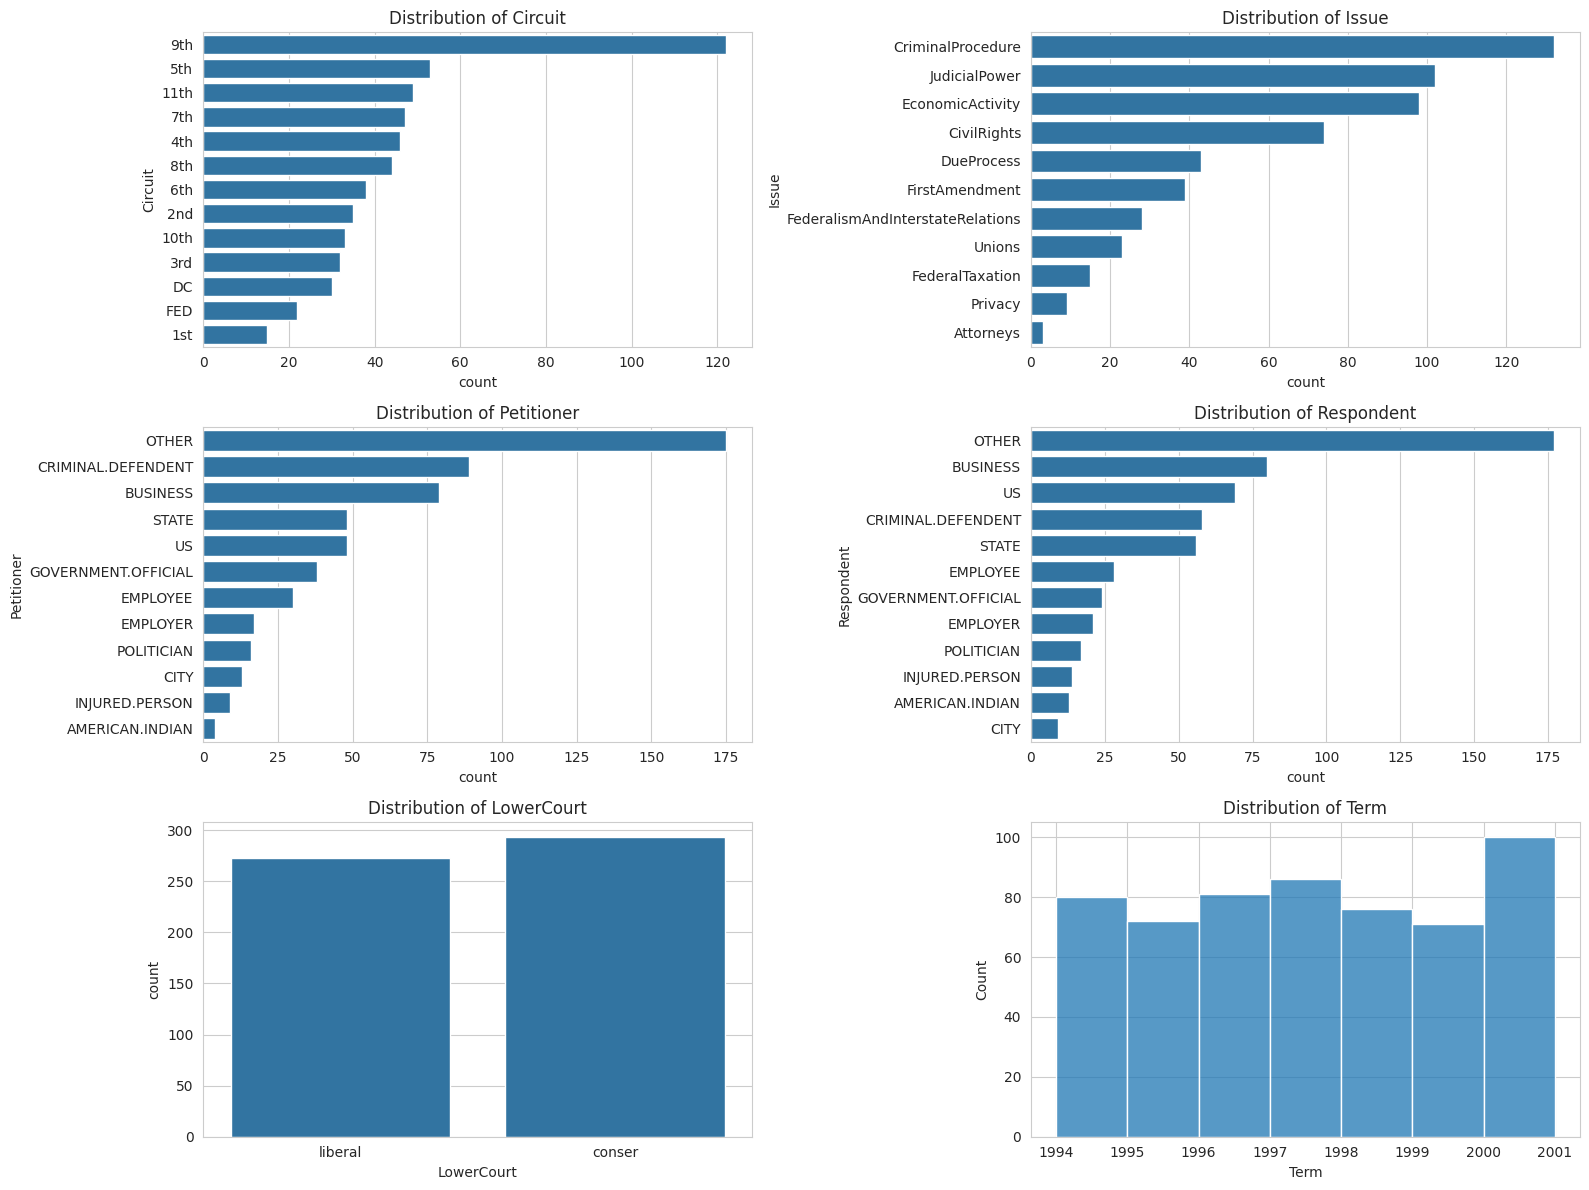

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of categorical variables
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Circuit distribution
sns.countplot(y=data['Circuit'], ax=ax[0, 0], order=data['Circuit'].value_counts().index)
ax[0, 0].set_title('Distribution of Circuit')

# Issue distribution
sns.countplot(y=data['Issue'], ax=ax[0, 1], order=data['Issue'].value_counts().index)
ax[0, 1].set_title('Distribution of Issue')

# Petitioner distribution
sns.countplot(y=data['Petitioner'], ax=ax[1, 0], order=data['Petitioner'].value_counts().index)
ax[1, 0].set_title('Distribution of Petitioner')

# Respondent distribution
sns.countplot(y=data['Respondent'], ax=ax[1, 1], order=data['Respondent'].value_counts().index)
ax[1, 1].set_title('Distribution of Respondent')

# Lower Court distribution
sns.countplot(x=data['LowerCourt'], ax=ax[2, 0])
ax[2, 0].set_title('Distribution of LowerCourt')

# Term distribution
sns.histplot(data['Term'], bins=int(data['Term'].max() - data['Term'].min()), kde=False, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of Term')

plt.tight_layout()
plt.show()


The visualizations provide insights into the distribution of variables in the dataset:

    Distribution of Circuit: The dataset includes cases from various circuits, with some circuits appearing more frequently than others. This could reflect the varying caseloads or the tendency of certain circuits to have their decisions reviewed by the Supreme Court.

    Distribution of Issue: The issues covered in the dataset span a range of categories, with some issues being more prevalent. This indicates the types of cases that are more commonly brought before the Supreme Court.

    Distribution of Petitioner and Respondent: Both fields show the types of parties involved in the cases. The visualization highlights the diversity of petitioners and respondents, though some types appear more frequently.

    Distribution of Lower Court Decision: The lower court's decisions are categorized as either liberal or conservative, showing a distribution of these outcomes. This variable could be significant when exploring relationships with the Supreme Court's reversal decisions.

    Distribution of Term: The histogram shows the distribution of cases over different terms, indicating the volume of cases per term that reached the Supreme Court.

Next, let's explore potential relationships between variables. Specifically, we can examine:

    The relationship between the Issue category and the Reverse decision to see if certain issues are more likely to be reversed.
    The impact of the Circuit on the Reverse decision to identify if cases from specific circuits are more likely to be overturned.

Let's start with the relationship between the Issue category and the Reverse decision.

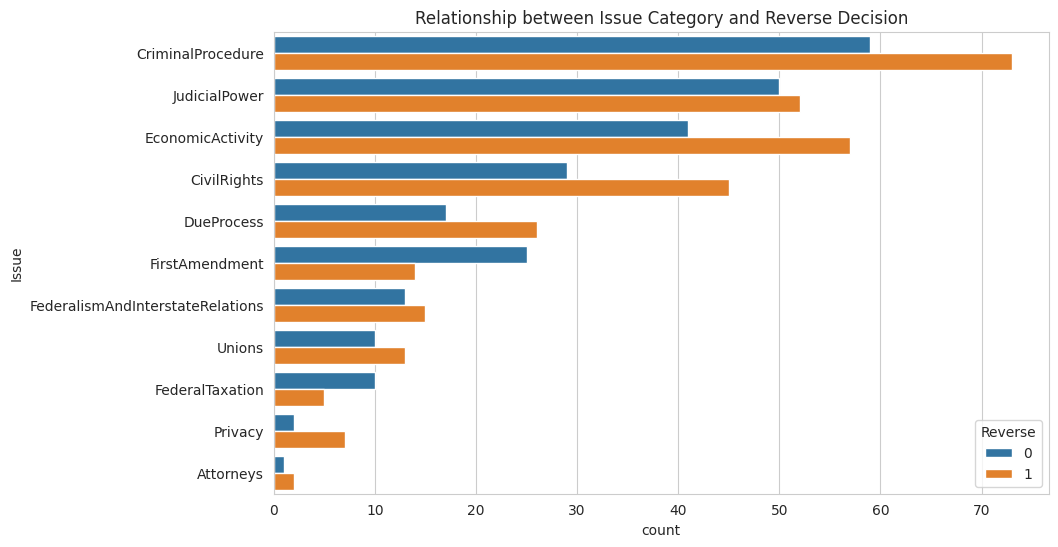

In [ ]:
# Relationship between Issue category and Reverse decision
plt.figure(figsize=(10, 6))
sns.countplot(y='Issue', hue='Reverse', data=data, order=data['Issue'].value_counts().index)
plt.title('Relationship between Issue Category and Reverse Decision')
plt.show()


The visualization of the relationship between the Issue category and the Reverse decision reveals:

    Certain issue categories exhibit a distinct pattern in terms of whether their decisions are more likely to be reversed by the Supreme Court. This might indicate that the Supreme Court has a particular interest or stance on specific types of cases, leading to a higher rate of reversal for those categories.

    The distribution of reversals across different issues suggests that some legal issues are more contentious or prone to differing interpretations, leading to a higher likelihood of reversal when reviewed by the Supreme Court.

Next, let's examine the impact of the Circuit on the Reverse decision to identify if cases from specific circuits are more likely to be overturned. This can provide insights into whether certain circuits have decisions that are more frequently challenged and reversed at the Supreme Court level.

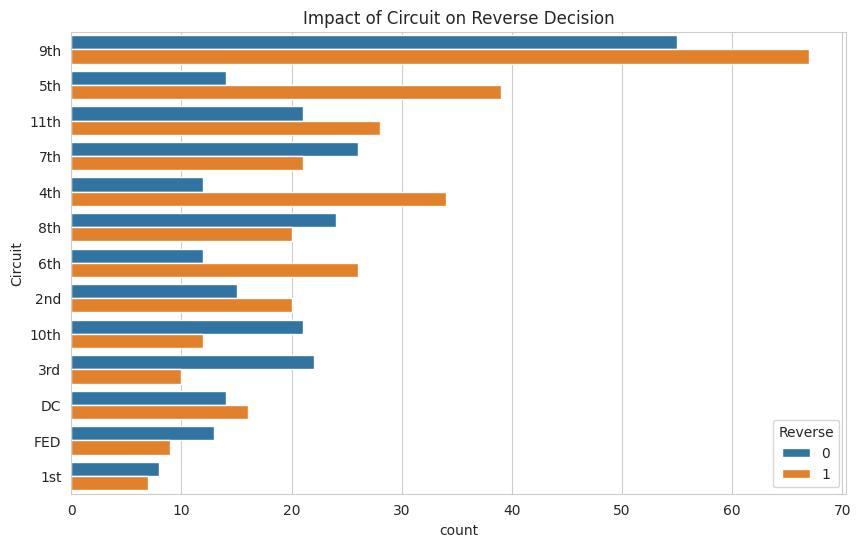

In [ ]:
# Relationship between Circuit and Reverse decision
plt.figure(figsize=(10, 6))
sns.countplot(y='Circuit', hue='Reverse', data=data, order=data['Circuit'].value_counts().index)
plt.title('Impact of Circuit on Reverse Decision')
plt.show()


The analysis of the impact of the Circuit on the Reverse decision shows:

    Variability in the reversal rates across different circuits. Some circuits have a higher number of their decisions reversed by the Supreme Court, while others have a lower reversal rate. This could reflect differences in judicial philosophy, the complexity of cases, or the legal precedents established within different circuits.

    The data suggests that the Supreme Court's review and reversal of lower court decisions are influenced by the originating circuit. This could be due to a variety of factors, including the legal standards applied by different circuits or the nature of the cases they tend to handle.

These insights can be valuable for understanding the dynamics of how and why the Supreme Court reverses decisions and the influence of circuit-level legal interpretations on Supreme Court outcomes.

If you have specific variables or relationships you'd like to explore further or any other questions about this dataset, please let me know!

To predict if a ruling will be reversed or notwe will perform a Classification and Regression Tree (CART) analysis on your dataset, we'll follow these steps:

    Prepare the Data: Ensure the data is in a suitable format for CART analysis, including encoding categorical variables if necessary and splitting the data into training and testing sets.
    Build the CART Model: Use the Decision Tree Classifier from scikit-learn (for classification tasks) or the Decision Tree Regressor (for regression tasks), based on the nature of your target variable.
    Generate the CART Diagram: Visualize the tree to interpret the decision-making process.
    Examine CART Diagnostics: Look at various diagnostics like feature importance, tree depth, and node purity to understand the decision-making process better.

Given the dataset involves a binary outcome (Reverse), we'll treat this as a classification task. The target variable for our CART analysis will be Reverse, indicating whether the Supreme Court reversed the lower court's decision.

Let's start by preparing the data, which includes encoding categorical variables and splitting the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define X (features) and y (target)
X = data.drop('Reverse', axis=1)
y = data['Reverse']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((452, 8), (114, 8), (452,), (114,))

The dataset has been prepared and split into training and testing sets, with 452 observations in the training set and 114 observations in the testing set. Each observation includes 8 features.

Next, we'll proceed to build the CART model using the Decision Tree Classifier. After fitting the model to the training data, we'll visualize the CART diagram and then examine the CART diagnostics to gain insights into the decision-making process

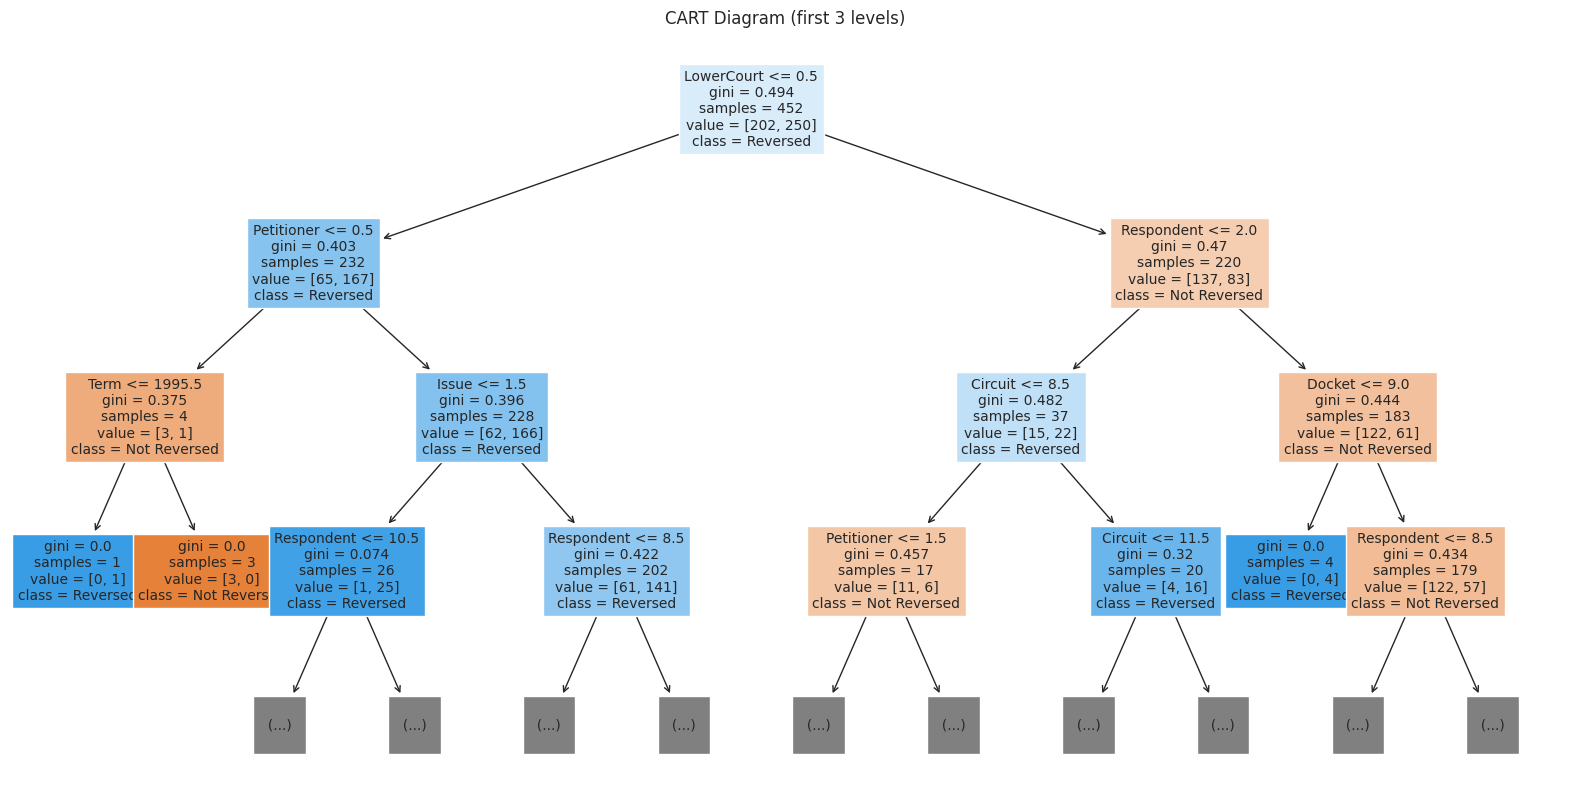

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and fit the Decision Tree Classifier
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Visualize the CART diagram
plt.figure(figsize=(20, 10))
plot_tree(cart_model, filled=True, feature_names=X.columns, class_names=['Not Reversed', 'Reversed'], max_depth=3, fontsize=10)
plt.title('CART Diagram (first 3 levels)')
plt.show()


The CART diagram displayed shows the first three levels of the decision tree for the classification of whether the Supreme Court reversed the lower court's decision (Reverse). In this diagram:

    Nodes: Each node represents a decision based on the value of a certain feature. The top node is the root of the tree, where the initial split is made.
    Edges/Branches: These indicate the outcome of the test (e.g., True or False) and lead to the next node or a leaf.
    Leaf Nodes: These represent the final outcomes where the tree makes a prediction (in this case, 'Not Reversed' or 'Reversed').

The colors (ranging from light orange to deep blue) illustrate the majority class within each node, with lighter colors indicating nodes with a majority of 'Not Reversed' cases and darker colors indicating a majority of 'Reversed' cases.

For better insight into the decision-making process, we'll examine CART diagnostics, focusing on feature importance. This will help us understand which features are most influential in predicting whether the Supreme Court reverses a decision.

Let's walk through the CART diagram, focusing on the first three levels shown in the visualization to understand the branching decisions, splitting criteria, and how these contribute to predicting outcomes in your dataset. The CART diagram is essentially a flowchart that makes decisions based on the data's features, leading to a prediction (in this case, whether the Supreme Court reversed a decision).
Root Node

    The root node represents the entire dataset before any splits have been made. The decision to split at this node is based on the feature that provides the most significant information gain, which, for our dataset, is the Docket feature. The value shown in the node indicates the criteria used to split the data (e.g., a specific threshold for Docket). The dataset is divided into two groups based on this criterion.

Branches and Internal Nodes

    From the root, the tree branches into internal nodes, where further decisions are made based on other features. Each branch represents an outcome of the test (e.g., Docket greater than a certain value). In the diagram, you can see how the tree uses other features such as Circuit, Issue, and LowerCourt for subsequent splits. The choice of feature for each split is again based on which feature at that point in the tree best separates the cases into Reversed and Not Reversed.

Leaf Nodes

    The process continues until it reaches a leaf node, which represents a prediction about the outcome. The leaf node will indicate the majority class of the samples that reach that leaf. If the leaf is mostly composed of cases that were reversed, it will predict 'Reversed'; otherwise, it predicts 'Not Reversed'. The color shading (from light orange to deep blue) gives a visual cue about the class distribution within each node, with deeper blue indicating a higher proportion of 'Reversed' outcomes.

Splitting Criteria

    The splitting criteria (e.g., Gini impurity) used in each node quantify how much a particular feature contributes to segregating the cases into homogeneous subgroups with respect to the target variable (Reverse). A lower value indicates a more homogeneous group of cases. The tree aims to find the splits that decrease this criterion the most, leading to the most distinct separation of the 'Reversed' and 'Not Reversed' classes.

Decision Path

    A decision path through the tree from the root to a leaf represents a set of conditions based on the features that lead to a specific prediction. By following the path and observing the decisions made at each node, you can understand the conditions under which the model predicts a particular outcome.

In summary, the CART diagram visually represents the decision-making process of the model. By examining the splits at each node, you can discern which features are most influential and how different feature values lead to the prediction of whether the Supreme Court will reverse a decision. The branching decisions and splitting criteria together elucidate the logic used by the model to arrive at its predictions, providing valuable insights into the factors influencing the outcomes in your dataset.

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': cart_model.feature_importances_}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
0,Docket,0.305773
2,Circuit,0.180371
3,Issue,0.126120
6,LowerCourt,0.118599
5,Respondent,0.087136
4,Petitioner,0.085443
1,Term,0.060930
7,Unconst,0.035628


The feature importance from the CART analysis indicates how influential each feature is in predicting whether the Supreme Court reverses a decision. The features are ranked as follows:

    Docket (30.58%): The docket number of the case is the most influential feature, suggesting that specific cases or the timing/order of cases might have a significant impact on the likelihood of reversal.
    Circuit (18.04%): The circuit from which the case originated is the second most important feature, indicating the influence of regional judicial contexts on the Supreme Court's decisions.
    Issue (12.61%): The issue category of the case also plays a crucial role, reflecting the substance of the legal matter at hand.
    LowerCourt (11.86%): The political leaning of the lower court's decision (liberal or conservative) is another important predictor, possibly reflecting how ideological alignments affect the Supreme Court's review outcomes.
    Respondent (8.71%) and Petitioner (8.54%): The types of parties involved in the case are also significant, albeit to a lesser extent.
    Term (6.09%): The term of the court during which the case was decided has some influence.
    Unconst (3.56%): The binary indicator of whether the case involves a constitutional issue is the least influential feature, although it still contributes to the model.

These diagnostics provide insights into the decision-making process of the Supreme Court, highlighting the importance of case specifics, regional judicial contexts, and the nature of legal issues in determining the likelihood of a case being reversed.